In [69]:
import yfinance 
import mplfinance as mpf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override() 
import pandas as pd
from scipy.stats import linregress

In [126]:
BTC_Data = yf.download('BTC-USD', start='2023-06-07', end='2023-06-08', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [127]:
ETH_Data = yf.download('ETH-USD', start='2023-05-15', end='2023-06-15')

[*********************100%***********************]  1 of 1 completed


In [128]:
BTC_Data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-06-07 00:00:00+00:00,"27,235.65","27,235.65","27,235.65","27,235.65","27,235.65",0
2023-06-07 00:01:00+00:00,"27,248.04","27,248.04","27,248.04","27,248.04","27,248.04",6070272
2023-06-07 00:02:00+00:00,"27,214.22","27,214.22","27,214.22","27,214.22","27,214.22",0
2023-06-07 00:03:00+00:00,"27,195.63","27,195.63","27,195.63","27,195.63","27,195.63",0
2023-06-07 00:04:00+00:00,"27,196.28","27,196.28","27,196.28","27,196.28","27,196.28",0
...,...,...,...,...,...,...
2023-06-07 23:54:00+00:00,"26,365.96","26,365.96","26,365.96","26,365.96","26,365.96",0
2023-06-07 23:55:00+00:00,"26,364.46","26,364.46","26,364.46","26,364.46","26,364.46",0
2023-06-07 23:56:00+00:00,"26,353.38","26,353.38","26,353.38","26,353.38","26,353.38",0


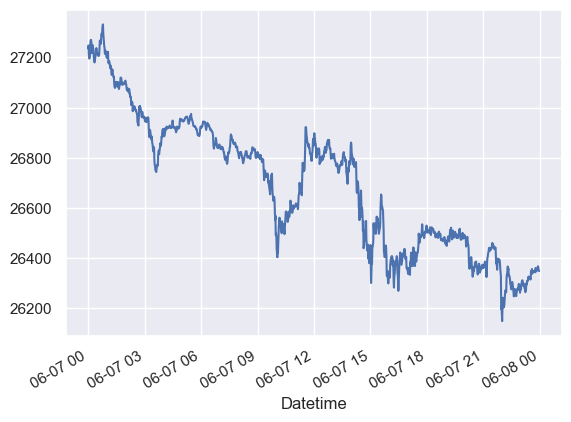

In [129]:
BTC_Data['Adj Close'].plot()
plt.show()

In [130]:
ETH_Data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,"1,800.37","1,845.70","1,787.54","1,817.55","1,817.55",6748889346
2023-05-16,"1,816.82","1,830.35","1,797.84","1,824.12","1,824.12",5595959668
2023-05-17,"1,824.07","1,835.55","1,786.67","1,821.86","1,821.86",6352161579
2023-05-18,"1,822.07","1,831.45","1,774.20","1,801.73","1,801.73",5673124255
2023-05-19,"1,800.99","1,826.19","1,797.43","1,812.59","1,812.59",4796110259
2023-05-20,"1,812.77","1,829.01","1,808.05","1,820.48","1,820.48",2951655969
2023-05-21,"1,820.14","1,827.92","1,799.95","1,804.53","1,804.53",3386768865
2023-05-22,"1,804.84","1,826.70","1,793.22","1,817.53","1,817.53",4534841049
2023-05-23,"1,817.78","1,869.34","1,816.29","1,854.38","1,854.38",6820047160


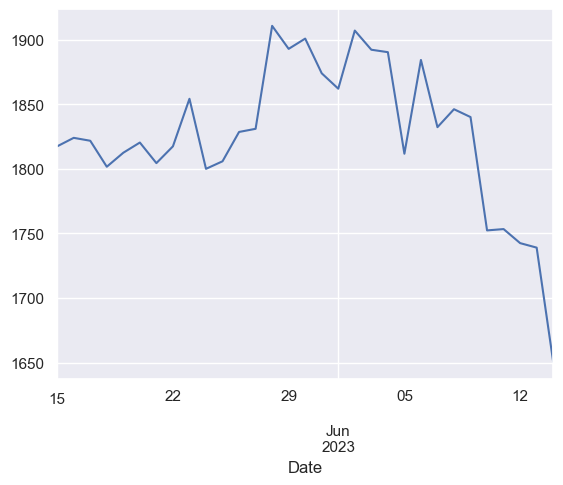

In [131]:
ETH_Data['Adj Close'].plot()
plt.show()

In [ ]:
# calculation of rho

In [149]:
# Now the value 𝜹=𝟏 will be used to find 𝝆
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

In [160]:
# Implementation of Black-Scholes formula in Python
import numpy as np
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho
# Define variables 
r = 0.01
S = 30
K = 40
T = 240/365
sigma = 0.30
def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = 0.8  # d1 is delta
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price, bs(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")
print("Option Price: ", blackScholes(r, S, K, T, sigma, "c"))



Option Price:  (-4.6150582747385265, 0.5132843798399411)


In [161]:
def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

def gamma_calc(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc, gamma(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")
def vega_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc*0.01, vega(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")
def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365, theta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

def rho_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01, rho(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [162]:
option_type='p'
print("       Rho  : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])

       Rho  :  [-0.235, -0.235]


In [133]:
 Rho = 0.235
beta = 1

In [163]:
coin_integrated_SP1= BTC_Data['Open'][0]
coin_integrated_SP2= ETH_Data['Open'][0]

In [164]:
coin_integrated_SP1

27235.650390625

In [165]:
coin_integrated_SP2

1800.3712158203125

In [166]:
import timetracker

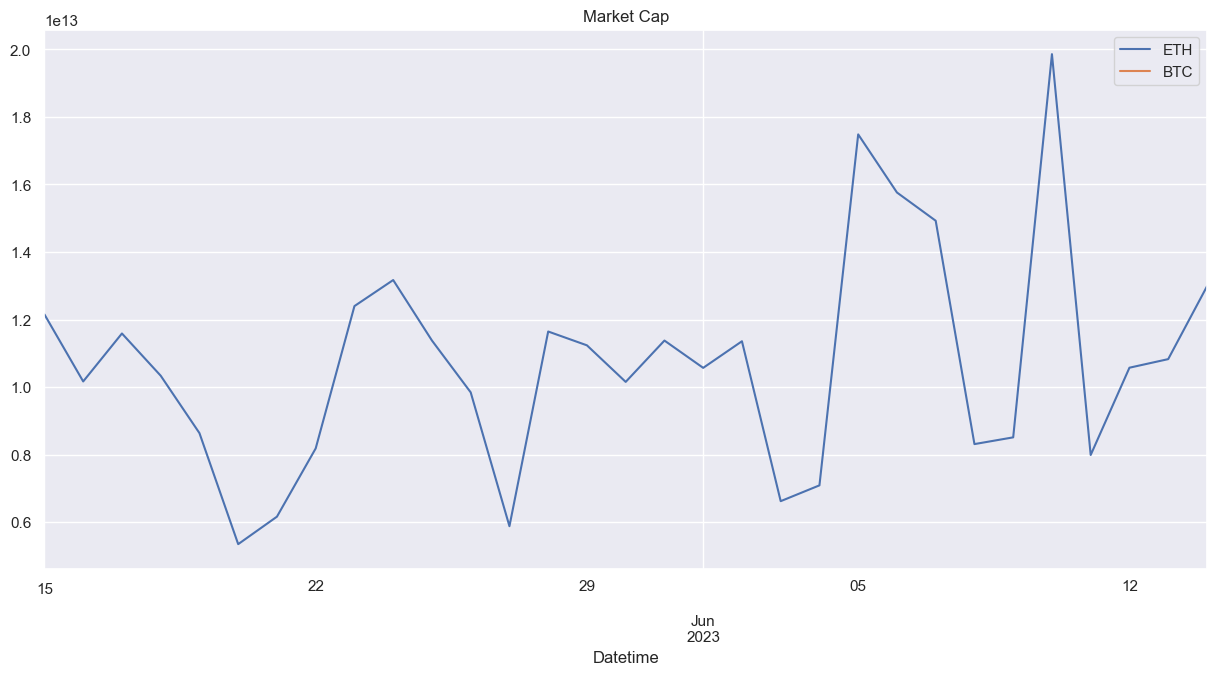

In [167]:
ETH_Data['MarktCap'] = ETH_Data['Open'] * ETH_Data['Volume']
BTC_Data['MarktCap'] = ETH_Data['Open'] * ETH_Data['Volume']
ETH_Data['MarktCap'].plot(label = 'ETH', figsize = (15,7))
BTC_Data['MarktCap'].plot(label = 'BTC')
plt.title('Market Cap')
plt.legend()

<Axes: xlabel='Date'>

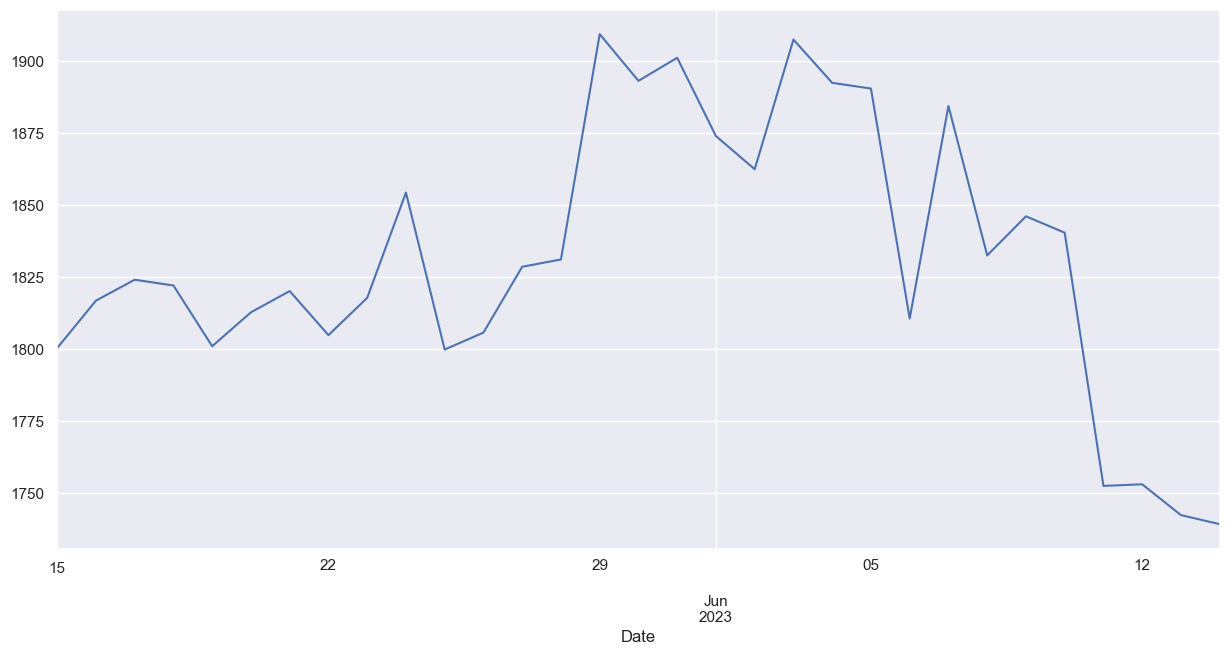

In [139]:
# Moving average

ETH_Data['MA50'] = ETH_Data['Open'].rolling(50).mean()
ETH_Data['MA200'] = ETH_Data['Open'].rolling(200).mean()
ETH_Data['Open'].plot(figsize = (15,7))
ETH_Data['MA50'].plot()
ETH_Data['MA200'].plot()

<Axes: xlabel='Datetime'>

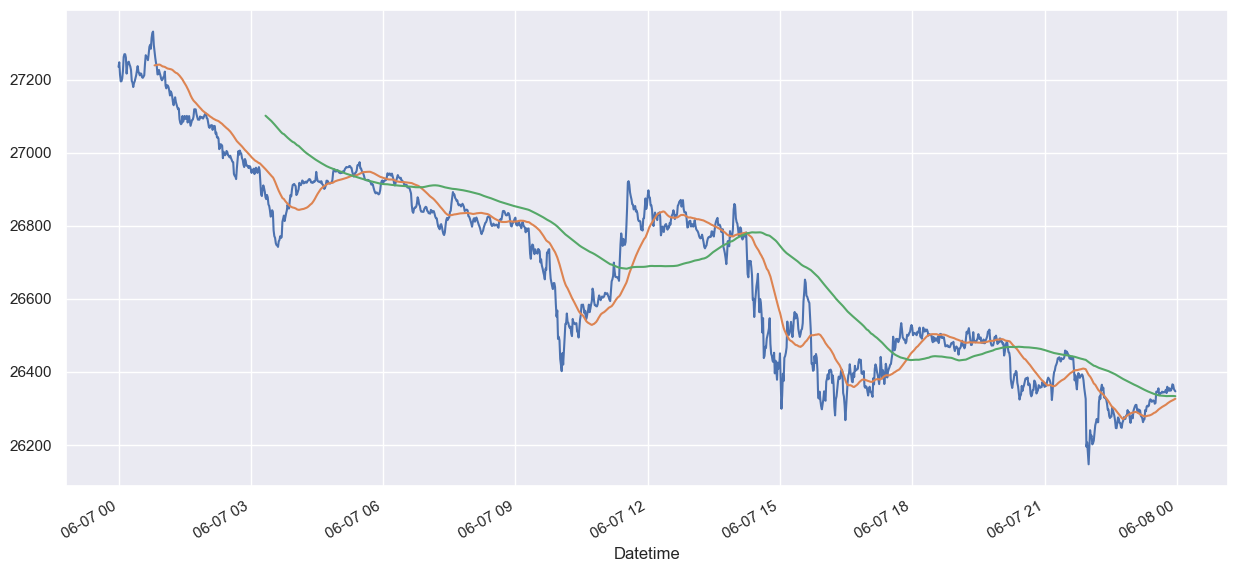

In [168]:
# Moving average

BTC_Data['MA50'] = BTC_Data['Open'].rolling(50).mean()
BTC_Data['MA200'] = BTC_Data['Open'].rolling(200).mean()
BTC_Data['Open'].plot(figsize = (15,7))
BTC_Data['MA50'].plot()
BTC_Data['MA200'].plot()

In [169]:
S1_0=BTC_Data['Open'][0]
S2_0=ETH_Data['Open'][0]

In [170]:
S1_0

27235.650390625

In [171]:
S2_0

1800.3712158203125

In [175]:
M_times = 1000
tt = np.linspace(0, 1, M_times + 1)

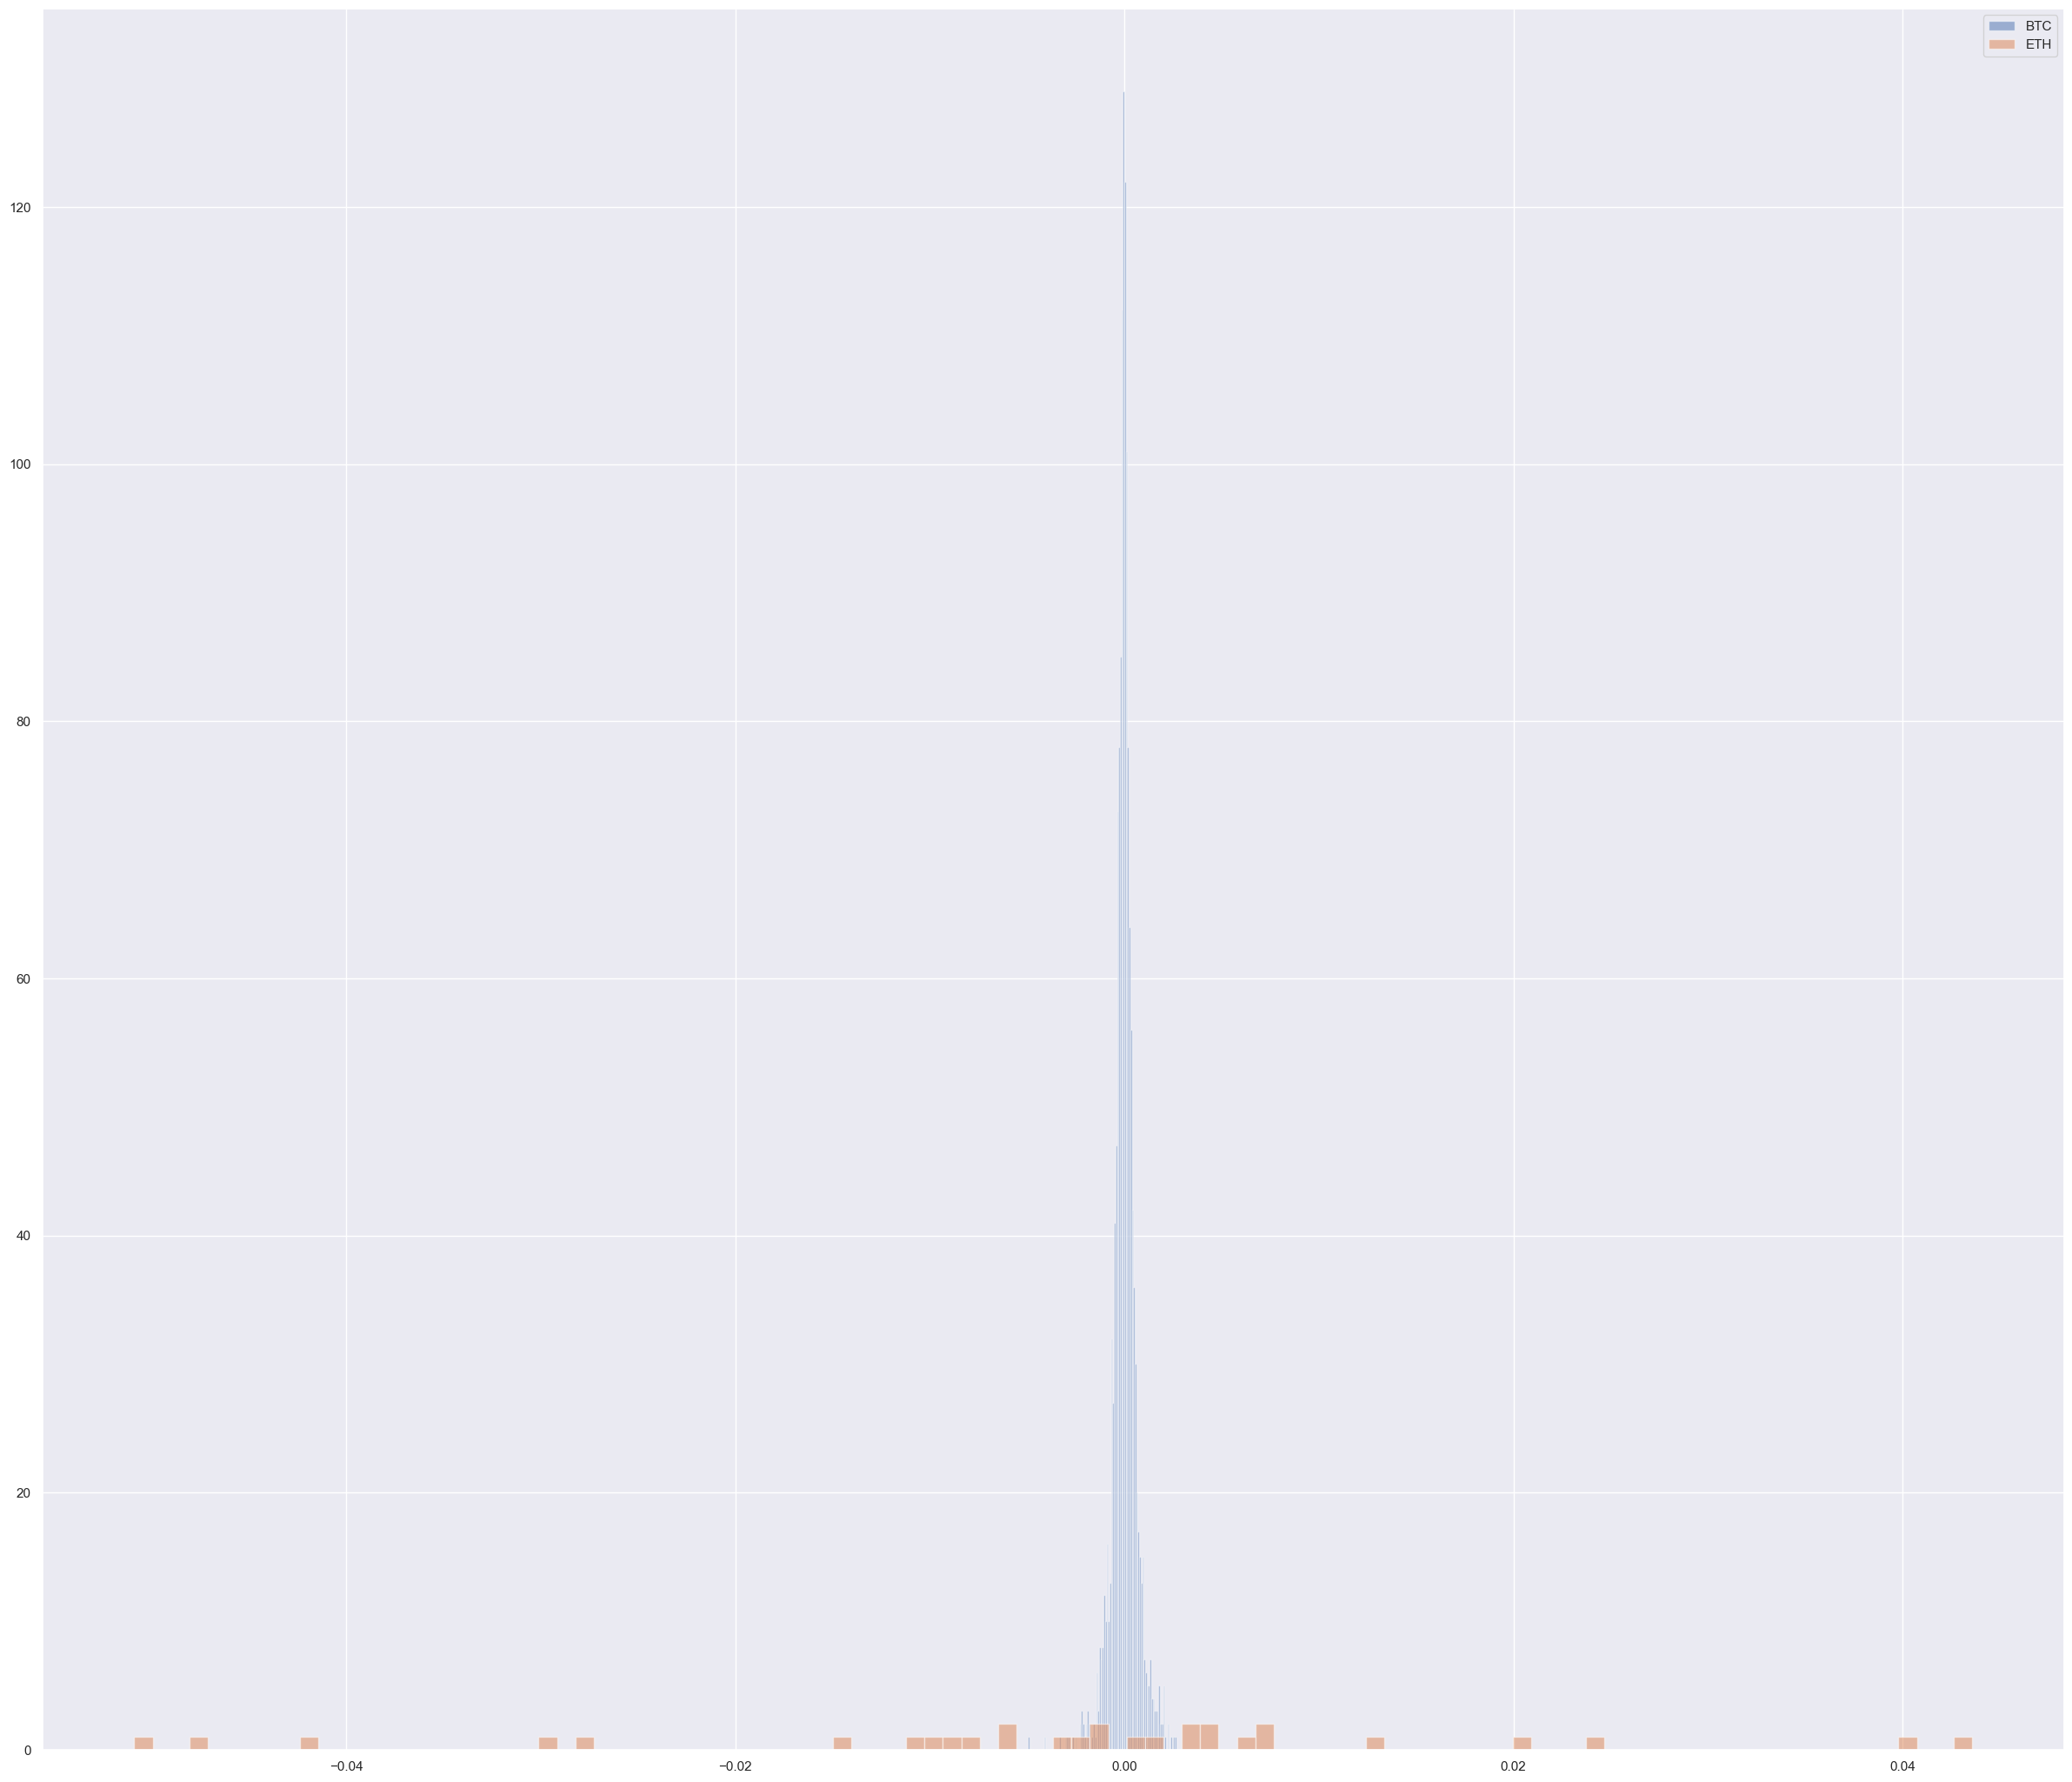

In [178]:
#Volatility
BTC_Data['returns'] = (BTC_Data['Close']/BTC_Data['Close'].shift(1)) -1
ETH_Data['returns'] = (ETH_Data['Close']/ETH_Data['Close'].shift(1))-1

BTC_Data['returns'].hist(bins = 100, label = 'BTC', alpha = 0.5, figsize = (30,26))
ETH_Data['returns'].hist(bins = 100, label = 'ETH', alpha = 0.5)

plt.legend()